<a href="https://colab.research.google.com/github/aidagomezbueno/CS539/blob/main/hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media Mining – Homework 2
*CS 539 - Social Media Mining | Francesca Spezzano*

*Computer Science | Boise State University*

*10.18.2022 | Fall 2022*

*Aida Gomezbueno Berezo | aidagomezbuenobe@u.boisestate.edu*


In [6]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 115th House retweets
*The “115th House retweets” is a political network where nodes represent 115th House congress **members** and edges represent **retweets** among them, i.e., edge (u,v) means u retweeted v at least once.*


In [7]:
graph = nx.read_gexf("115th House retweets.gexf")
G = graph.to_undirected()

In [8]:
#Largest connected component computation
largest_cc = max(nx.connected_components(G), key=len)
G0 = G.subgraph(largest_cc)

 ### Real-world social networks' properties.
 

*   Power law degree distribution.
*   High average local clustering coefficient.
*   Low average path length.

#### Power - law distribution test:
*   *Pick the measure and compute it for the whole network.*
*   *Compute p(k), the fraction of individuals having popularity k.*
*   *Plot a log-log graph, where the x-axis represents ln k and the y-axis represents ln p(k).*
*   *If a power-law distribution exists, we should observe a straight line.*

In [11]:
#We say that two related quantities a and and b follow a power law if one quantity varies as a power of another.
n_nodes = G0.number_of_nodes()
node_list = []
degree_list = []
for n, d in G0.degree:
  node_list.append(n)
  degree_list.append(d)

#Node: member.
#Degree: # of members with who each member has exchanged RTs.
cols = ['Node'] 
df = pd.DataFrame(node_list, columns=cols)
df['Degree'] = degree_list

#Sum of all the degrees.
total_degree = sum(df.Degree)
df

,Node,Degree
0,2970279814,81
1,1068499286,72
2,252819323,22
3,36686040,53
4,168673083,5
...,...,...
426,816705409486618624,10
427,1058256326,21
428,816298918468259841,88
429,3044993235,71


In [12]:
freq_dict = {x:degree_list.count(x) for x in degree_list}
freq_dict
n_degree = []
n_freq = []
for k in freq_dict.keys():
  n_degree.append(k)
for v in freq_dict.values():
  n_freq.append(v)
dcols = ['Degree_k']
df_freq = pd.DataFrame(n_degree, columns=dcols)
df_freq = df_freq.sort_values('Degree_k')
df_freq['Freq'] = n_freq
p_x_freq = []
for f in df_freq.Freq:
  p_x_freq.append(f/total_degree)
df_freq['P_k'] = p_x_freq
df_freq

,Degree_k,Freq,P_k
43,1,2,0.000118
27,2,2,0.000118
44,3,5,0.000296
7,4,1,0.000059
4,5,15,0.000887
...,...,...,...
35,138,2,0.000118
83,165,1,0.000059
98,168,1,0.000059
95,173,1,0.000059


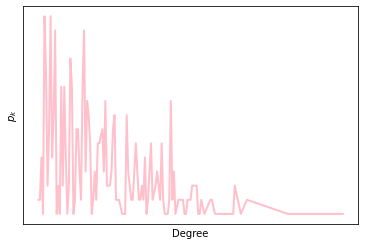

In [13]:
plt.ylabel('$p_k$')
plt.xlabel('Degree')
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)
degree_dist_plot = plt.plot(df_freq.Degree_k, df_freq.P_k, linewidth=2, color='pink')

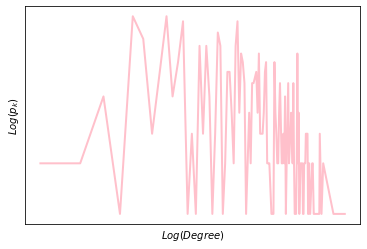

In [14]:
xlog = np.log(df_freq.Degree_k)
ylog = np.log(df_freq.P_k)
plt.ylabel('$Log(p_k)$')
plt.xlabel('$Log(Degree)$')
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = False, bottom = False)
loglog_plot = plt.plot(xlog, ylog, linewidth=2, color='pink')

*As explained above, if a power-law distribution exists, we should observe a straight line. No straight line exists, so it means it **does not satisfy the power-law degree distribution** property.*

#### Local Clustering Coefficient
*   *To determine whether a Real-World Graph has a high average local clustering coefficient, its measure must be compared with the result obtained in a Simulated Graph.*

*To do this, a Random Graph with a fixed number of nodes and a probability ($p$) that $C(n, 2)$ edges form independently is computed.*

*   *$p = c /(n-1)$, where $p$ is the probability that edges are selected independently, $c$ is the average degree, and $n$ the # of nodes involved in the graph (subgraph resulting from the largest connected component of the initial graph).*

*By comparing both results, we could conclude if the average local clustering coefficient is high (being even higher than on the simulated graph).*

In [ ]:
#probability(p)=average degree/(nodes-1)
n_degrees = len(df_freq.Degree_k)
avg_degree = total_degree/n_degrees
p = avg_degree/(n_nodes-1)
rand_G = nx.gnp_random_graph(n_nodes, p, 50)
r_avg_ccoef = nx.average_clustering(rand_G)
avg_ccoef = nx.average_clustering(G0)
print("Simulated Random Graph Average Clustering Coefficient: ", '{:.2f}'.format(r_avg_ccoef))
print("115th House Retweets Graph Average Clustering Coefficient: ", '{:.2f}'.format(avg_ccoef))

Simulated Random Graph Average Clustering Coefficient:  0.34
115th House Retweets Graph Average Clustering Coefficient:  0.43


*The average local clustering coefficient is high as compared to random graph. It means that transitivity does not happen by chance.*

#### Shortest Path Length

In [15]:
avg_p_len = nx.average_shortest_path_length(G0)
print("115th House Retweets Graph Average Path Length: ", '{:.2f}'.format(avg_p_len))

115th House Retweets Graph Average Path Length:  2.21


In [20]:
c = ['Power-Law Degree Distribution', 'High Average Local Clustering coefficient', 'Low Average Path Length']
data = [['No', 'Yes', 'Yes']]
summary = pd.DataFrame(data, columns = c)
print("Does G0 satisfies the three properties of real-world social networks?")
summary

Does G0 satisfies the three properties of real-world social networks?


,Power-Law Degree Distribution,High Average Local Clustering coefficient,Low Average Path Length
0,No,Yes,Yes


 ### Real-world social networks' centrality measures
 

*   Degree centrality.
*   Eigenvector centrality.
*   Pagerank.
*   Betweenness centrality.
*   Closeness centrality.

#### Degree Centrality
*   *It is the number of edges it has.*
*   *The **higher** the degree, the **more central** the node is.*



In [ ]:
d_cent = nx.degree_centrality(G0)
d_cent = dict(sorted(d_cent.items(), key=lambda item:item[1], reverse=True))
#top_d_cent = take(10, d_cent.items())
d_cent = dict(list(d_cent.items())[:10])
#print(d_cent)
k = 1
print("According to Degree Centrality: ")
for i, j in d_cent.items():
  print("   Top ", k, " most central node: ", i, "\n      Centrality: ", '{:.3f}'.format(j), "\n")
  k += 1

According to Degree Centrality: 
   Top  1  most central node:  18916432 
      Centrality:  0.467 

   Top  2  most central node:  15764644 
      Centrality:  0.402 

   Top  3  most central node:  1209417007 
      Centrality:  0.391 

   Top  4  most central node:  22012091 
      Centrality:  0.384 

   Top  5  most central node:  2962868158 
      Centrality:  0.321 

   Top  6  most central node:  111635980 
      Centrality:  0.312 

   Top  7  most central node:  24195214 
      Centrality:  0.302 

   Top  8  most central node:  242426145 
      Centrality:  0.302 

   Top  9  most central node:  1077121945 
      Centrality:  0.302 

   Top  10  most central node:  40302336 
      Centrality:  0.300 



#### Eigenvector Centrality
*   *It measures the **transitive influence** of nodes.*
*   *A **high eigenvector score** means that a node is connected to many **nodes who themselves have high scores**.*



In [ ]:
eigenvector_cent = nx.eigenvector_centrality(G0)
eigenvector_cent = dict(sorted(eigenvector_cent.items(), key=lambda item:item[1], reverse=True))
#top_d_cent = take(10, d_cent.items())
eigenvector_cent = dict(list(eigenvector_cent.items())[:10])
#print(d_cent)
k = 1
print("According to Eigenvector Centrality:\n")
for i, j in eigenvector_cent.items():
  print("   Top ", k, " most central node: ", i, "\n      Centrality: ", '{:.3f}'.format(j), "\n")
  k += 1

According to Eigenvector Centrality:

   Top  1  most central node:  15764644 
      Centrality:  0.146 

   Top  2  most central node:  22012091 
      Centrality:  0.141 

   Top  3  most central node:  111635980 
      Centrality:  0.130 

   Top  4  most central node:  24195214 
      Centrality:  0.128 

   Top  5  most central node:  2962868158 
      Centrality:  0.126 

   Top  6  most central node:  1077121945 
      Centrality:  0.124 

   Top  7  most central node:  140519774 
      Centrality:  0.119 

   Top  8  most central node:  384913290 
      Centrality:  0.118 

   Top  9  most central node:  40302336 
      Centrality:  0.117 

   Top  10  most central node:  2863006655 
      Centrality:  0.117 



#### PageRank
*   *Algorithm used by Google to calculate the importance of a particular web page based on its incoming links.*
*   *The **higher** the PageRank of a link, the **more authoritative** it is.*
*   *A page that is linked to by many pages with high PageRank receives a high rank itself.*




In [ ]:
pagerank_cent = nx.pagerank(G0)
pagerank_cent = dict(sorted(pagerank_cent.items(), key=lambda item:item[1], reverse=True))
#top_d_cent = take(10, d_cent.items())
pagerank_cent = dict(list(pagerank_cent.items())[:10])
#print(d_cent)
k = 1
print("According to PageRank:\n")
for i, j in pagerank_cent.items():
  print("   Top ", k, " most central node: ", i, "\n      Score: ", '{:.3f}'.format(j), "\n")
  k += 1

According to PageRank:

   Top  1  most central node:  18916432 
      Score:  0.017 

   Top  2  most central node:  1209417007 
      Score:  0.013 

   Top  3  most central node:  19739126 
      Score:  0.010 

   Top  4  most central node:  17976923 
      Score:  0.010 

   Top  5  most central node:  235312723 
      Score:  0.008 

   Top  6  most central node:  15764644 
      Score:  0.008 

   Top  7  most central node:  22012091 
      Score:  0.007 

   Top  8  most central node:  2962868158 
      Score:  0.006 

   Top  9  most central node:  242426145 
      Score:  0.006 

   Top  10  most central node:  1077121945 
      Score:  0.006 



#### Betweenness Centrality
*   *How important nodes are in connecting other nodes.*
*   *The amount of **influence** a node has over the flow of information in a graph.*
*   *Nodes with **high** betweenness might have considerable influence within a network in terms of their **control over information** passing between others.*

In [ ]:
betweenness_cent = nx.betweenness_centrality(G0)
betweenness_cent = dict(sorted(betweenness_cent.items(), key=lambda item:item[1], reverse=True))
#top_d_cent = take(10, d_cent.items())
betweenness_cent = dict(list(betweenness_cent.items())[:10])
#print(d_cent)
k = 1
print("According to Betweenness Centrality:\n")
for i, j in betweenness_cent.items():
  print("   Top ", k, " most central node: ", i, "\n      Centrality: ", '{:.3f}'.format(j), "\n")
  k += 1

According to Betweenness Centrality:

   Top  1  most central node:  18916432 
      Centrality:  0.123 

   Top  2  most central node:  1209417007 
      Centrality:  0.089 

   Top  3  most central node:  17976923 
      Centrality:  0.037 

   Top  4  most central node:  19739126 
      Centrality:  0.034 

   Top  5  most central node:  15764644 
      Centrality:  0.026 

   Top  6  most central node:  14275291 
      Centrality:  0.025 

   Top  7  most central node:  235312723 
      Centrality:  0.020 

   Top  8  most central node:  22012091 
      Centrality:  0.020 

   Top  9  most central node:  242426145 
      Centrality:  0.015 

   Top  10  most central node:  248735463 
      Centrality:  0.014 



#### Closeness Centrality
*   *How close a node is to all other nodes in the network.*
*   *Influential and central nodes can **quickly reach** other nodes.*
*   *These nodes should have a **smaller average shortest path length** to other nodes.*
*   Nodes with a **high closeness score** have the shortest distances to all other nodes.






In [ ]:
closeness_cent = nx.closeness_centrality(G0)
closeness_cent = dict(sorted(closeness_cent.items(), key=lambda item:item[1], reverse=True))
#top_d_cent = take(10, d_cent.items())
closeness_cent = dict(list(closeness_cent.items())[:10])
#print(d_cent)
k = 1
print("According to Closeness Centrality:\n")
for i, j in closeness_cent.items():
  print("   Top ", k, " most central node: ", i, "\n      Centrality: ", '{:.3f}'.format(j), "\n")
  k += 1

According to Closeness Centrality:

   Top  1  most central node:  18916432 
      Centrality:  0.640 

   Top  2  most central node:  1209417007 
      Centrality:  0.615 

   Top  3  most central node:  15764644 
      Centrality:  0.596 

   Top  4  most central node:  22012091 
      Centrality:  0.588 

   Top  5  most central node:  19739126 
      Centrality:  0.573 

   Top  6  most central node:  137794015 
      Centrality:  0.567 

   Top  7  most central node:  17976923 
      Centrality:  0.561 

   Top  8  most central node:  2916086925 
      Centrality:  0.544 

   Top  9  most central node:  2962868158 
      Centrality:  0.541 

   Top  10  most central node:  242426145 
      Centrality:  0.541 

